<a href="https://colab.research.google.com/github/amarsinghen/santander-product-recommendation/blob/master/Santander_Product_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x

In [2]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [3]:
!nvidia-smi
tf.config.experimental.list_physical_devices()

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU')]

In [4]:
!lscpu

Architecture:        x86_64
CPU op-mode(s):      32-bit, 64-bit
Byte Order:          Little Endian
CPU(s):              40
On-line CPU(s) list: 0-39
Thread(s) per core:  2
Core(s) per socket:  20
Socket(s):           1
NUMA node(s):        1
Vendor ID:           GenuineIntel
CPU family:          6
Model:               63
Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Stepping:            0
CPU MHz:             2300.000
BogoMIPS:            4600.00
Hypervisor vendor:   KVM
Virtualization type: full
L1d cache:           32K
L1i cache:           32K
L2 cache:            256K
L3 cache:            46080K
NUMA node0 CPU(s):   0-39
Flags:               fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd i

Importing the train and test data from google drive

In [0]:
import zipfile
files = ['train_ver2.csv.zip', 'test_ver2.csv.zip']
for file in files:
  local_zip = '/content/drive/My Drive/datasets/santander-product-recommendation/' + file
  zip_ref = zipfile.ZipFile(local_zip, 'r')
  zip_ref.extractall('/tmp')
  zip_ref.close()

In [0]:
# !cp sample_data '/content/drive/My Drive/datasets/santander-product-recommendation/'

In [7]:
!head -10 '/tmp/train_ver2.csv'

"fecha_dato","ncodpers","ind_empleado","pais_residencia","sexo","age","fecha_alta","ind_nuevo","antiguedad","indrel","ult_fec_cli_1t","indrel_1mes","tiprel_1mes","indresi","indext","conyuemp","canal_entrada","indfall","tipodom","cod_prov","nomprov","ind_actividad_cliente","renta","segmento","ind_ahor_fin_ult1","ind_aval_fin_ult1","ind_cco_fin_ult1","ind_cder_fin_ult1","ind_cno_fin_ult1","ind_ctju_fin_ult1","ind_ctma_fin_ult1","ind_ctop_fin_ult1","ind_ctpp_fin_ult1","ind_deco_fin_ult1","ind_deme_fin_ult1","ind_dela_fin_ult1","ind_ecue_fin_ult1","ind_fond_fin_ult1","ind_hip_fin_ult1","ind_plan_fin_ult1","ind_pres_fin_ult1","ind_reca_fin_ult1","ind_tjcr_fin_ult1","ind_valo_fin_ult1","ind_viv_fin_ult1","ind_nomina_ult1","ind_nom_pens_ult1","ind_recibo_ult1"
2015-01-28,1375586,N,ES,H, 35,2015-01-12, 0,      6, 1,,1.0,A,S,N,,KHL,N, 1,29,"MALAGA", 1,87218.1,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0, 0, 0,0
2015-01-28,1050611,N,ES,V, 23,2012-08-10, 0,     35, 1,,1,I,S,S,,KHE,

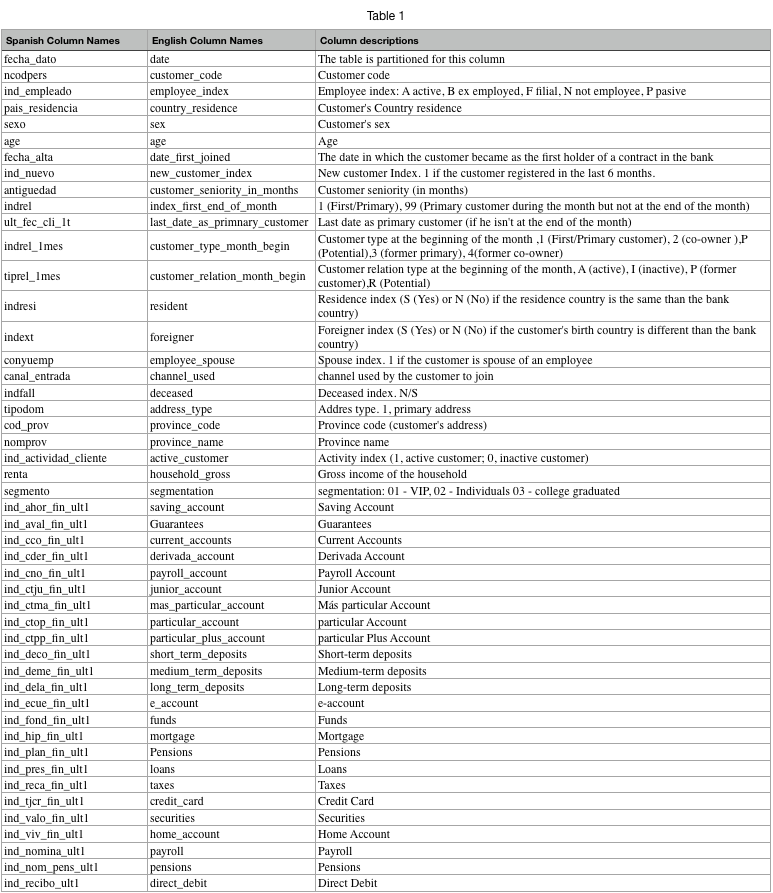

In [8]:
import pandas as pd
spr_train_df = pd.read_csv('/tmp/train_ver2.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
# spr_test_df = pd.read_csv('/tmp/test_ver2.csv')

### Column Names


In [10]:
spr_train_df.columns

Index(['fecha_dato', 'ncodpers', 'ind_empleado', 'pais_residencia', 'sexo',
       'age', 'fecha_alta', 'ind_nuevo', 'antiguedad', 'indrel',
       'ult_fec_cli_1t', 'indrel_1mes', 'tiprel_1mes', 'indresi', 'indext',
       'conyuemp', 'canal_entrada', 'indfall', 'tipodom', 'cod_prov',
       'nomprov', 'ind_actividad_cliente', 'renta', 'segmento',
       'ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1',
       'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1',
       'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1',
       'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1',
       'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1',
       'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1',
       'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1',
       'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1'],
      dtype='object')

In [0]:
spr_train_df.columns = ['date','customer_code','employee_index','country_residence','sex','age','date_first_joined','new_customer_index','customer_seniority_in_months','index_first_end_of_month','last_date_as_primary_customer','customer_type_month_begin','customer_relation_month_begin','resident','foreigner','employee_spouse','channel_used','deceased','address_type','province_code','province_name','active_customer','household_gross','segmentation','saving_account','guarantees','current_accounts','derivada_account','payroll_account','junior_account','mas_particular_account','particular_account','particular_plus_account','short_term_deposits','medium_term_deposits','long_term_deposits','e_account','funds','mortgage','pensions_1','loans','taxes','credit_card','securities','home_account','payroll','pensions_2','direct_debit']

In [12]:
spr_train_df.columns

Index(['date', 'customer_code', 'employee_index', 'country_residence', 'sex',
       'age', 'date_first_joined', 'new_customer_index',
       'customer_seniority_in_months', 'index_first_end_of_month',
       'last_date_as_primary_customer', 'customer_type_month_begin',
       'customer_relation_month_begin', 'resident', 'foreigner',
       'employee_spouse', 'channel_used', 'deceased', 'address_type',
       'province_code', 'province_name', 'active_customer', 'household_gross',
       'segmentation', 'saving_account', 'guarantees', 'current_accounts',
       'derivada_account', 'payroll_account', 'junior_account',
       'mas_particular_account', 'particular_account',
       'particular_plus_account', 'short_term_deposits',
       'medium_term_deposits', 'long_term_deposits', 'e_account', 'funds',
       'mortgage', 'pensions_1', 'loans', 'taxes', 'credit_card', 'securities',
       'home_account', 'payroll', 'pensions_2', 'direct_debit'],
      dtype='object')

In [0]:
# spr_test_df.columns

In [0]:
# spr_test_df.columns = ['date','customer_code','employee_index','country_residence','sex','age','date_first_joined','new_customer_index','customer_seniority_in_months','index_first_end_of_month','last_date_as_primary_customer','customer_type_month_begin','customer_relation_month_begin','resident','foreigner','employee_spouse','channel_used','deceased','address_type','province_code','province_name','active_customer','household_gross','segmentation']

In [0]:
# spr_test_df.columns

### Sample DF Data

In [16]:
spr_train_df[:5]

,date,customer_code,employee_index,country_residence,sex,age,date_first_joined,new_customer_index,customer_seniority_in_months,index_first_end_of_month,last_date_as_primary_customer,customer_type_month_begin,customer_relation_month_begin,resident,foreigner,employee_spouse,channel_used,deceased,address_type,province_code,province_name,active_customer,household_gross,segmentation,saving_account,guarantees,current_accounts,derivada_account,payroll_account,junior_account,mas_particular_account,particular_account,particular_plus_account,short_term_deposits,medium_term_deposits,long_term_deposits,e_account,funds,mortgage,pensions_1,loans,taxes,credit_card,securities,home_account,payroll,pensions_2,direct_debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,122179.11,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,NaN,1,I,S,N,NaN,KHD,N,1.0,50.0,ZARAGOZA,0.0,119775.54,03 - UNIVERSITARIO,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,A,S,N,NaN,KHE,N,1.0,50.0,ZARAGOZA,1.0,NaN,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [0]:
# spr_test_df[:5]

In [0]:
# from pandas_profiling import ProfileReport

### TRAIN DF PROFILE

In [0]:
# ProfileReport(spr_train_df)

### TEST DF PROFILE

In [0]:
# ProfileReport(spr_test_df)

### Creating New Dataframes for Data Processing

In [0]:
spr_train_processed_df = spr_train_df

In [22]:
spr_train_processed_df[:2]

,date,customer_code,employee_index,country_residence,sex,age,date_first_joined,new_customer_index,customer_seniority_in_months,index_first_end_of_month,last_date_as_primary_customer,customer_type_month_begin,customer_relation_month_begin,resident,foreigner,employee_spouse,channel_used,deceased,address_type,province_code,province_name,active_customer,household_gross,segmentation,saving_account,guarantees,current_accounts,derivada_account,payroll_account,junior_account,mas_particular_account,particular_account,particular_plus_account,short_term_deposits,medium_term_deposits,long_term_deposits,e_account,funds,mortgage,pensions_1,loans,taxes,credit_card,securities,home_account,payroll,pensions_2,direct_debit
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,NaN,1,A,S,N,NaN,KHL,N,1.0,29.0,MALAGA,1.0,87218.10,02 - PARTICULARES,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,NaN,1,I,S,S,NaN,KHE,N,1.0,13.0,CIUDAD REAL,0.0,35548.74,03 - UNIVERSITARIO,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [0]:
# spr_test_processed_df = spr_test_df

In [0]:
# spr_test_processed_df[:2]

### Verifying which columns have null values

In [25]:
spr_train_processed_df.isnull().any()

date                             False
customer_code                    False
employee_index                    True
country_residence                 True
sex                               True
age                              False
date_first_joined                 True
new_customer_index                True
customer_seniority_in_months     False
index_first_end_of_month          True
last_date_as_primary_customer     True
customer_type_month_begin         True
customer_relation_month_begin     True
resident                          True
foreigner                         True
employee_spouse                   True
channel_used                      True
deceased                          True
address_type                      True
province_code                     True
province_name                     True
active_customer                   True
household_gross                   True
segmentation                      True
saving_account                   False
guarantees               

In [26]:
spr_train_processed_df.isnull().sum()

date                                    0
customer_code                           0
employee_index                      27734
country_residence                   27734
sex                                 27804
age                                     0
date_first_joined                   27734
new_customer_index                  27734
customer_seniority_in_months            0
index_first_end_of_month            27734
last_date_as_primary_customer    13622516
customer_type_month_begin          149781
customer_relation_month_begin      149781
resident                            27734
foreigner                           27734
employee_spouse                  13645501
channel_used                       186126
deceased                            27734
address_type                        27735
province_code                       93591
province_name                       93591
active_customer                     27734
household_gross                   2794375
segmentation                      

## Column by column cleaning up the data

### customer_code

In [27]:
spr_train_processed_df.customer_code.value_counts()

32752      17
1273696    17
1224536    17
1199940    17
1208128    17
           ..
1549150     1
1543059     1
1535935     1
1551255     1
1489485     1
Name: customer_code, Length: 956645, dtype: int64

### ["employee_index", "index_first_end_of_month","address_type"]
Replacing null values to max value in each column type

In [0]:
max_columns = ["employee_index", "index_first_end_of_month", "address_type"]

In [0]:
for column_name in max_columns:
  # Finding the value with maximum occurance in the column
  value = spr_train_processed_df[column_name].value_counts().idxmax()
  spr_train_processed_df.loc[spr_train_processed_df[column_name].isnull(),column_name] = value

### 4. country_residence column - Assigning missing to UK = unknown

In [30]:
spr_train_processed_df["country_residence"].unique()

array(['ES', nan, 'CA', 'CH', 'CL', 'IE', 'AT', 'NL', 'FR', 'GB', 'DE',
       'DO', 'BE', 'AR', 'VE', 'US', 'MX', 'BR', 'IT', 'EC', 'PE', 'CO',
       'HN', 'FI', 'SE', 'AL', 'PT', 'MZ', 'CN', 'TW', 'PL', 'IN', 'CR',
       'NI', 'HK', 'AD', 'CZ', 'AE', 'MA', 'GR', 'PR', 'RO', 'IL', 'RU',
       'GT', 'GA', 'NO', 'SN', 'MR', 'UA', 'BG', 'PY', 'EE', 'SV', 'ET',
       'CM', 'SA', 'CI', 'QA', 'LU', 'PA', 'BA', 'BO', 'AU', 'BY', 'KE',
       'SG', 'HR', 'MD', 'SK', 'TR', 'AO', 'CU', 'GQ', 'EG', 'ZA', 'DK',
       'UY', 'GE', 'TH', 'DZ', 'LB', 'JP', 'NG', 'PK', 'TN', 'TG', 'KR',
       'GH', 'RS', 'VN', 'PH', 'KW', 'NZ', 'MM', 'KH', 'GI', 'SL', 'GN',
       'GW', 'OM', 'CG', 'LV', 'LT', 'ML', 'MK', 'HU', 'IS', 'LY', 'CF',
       'GM', 'KZ', 'CD', 'BZ', 'ZW', 'DJ', 'JM', 'BM', 'MT'], dtype=object)

In [31]:
spr_train_processed_df.loc[spr_train_processed_df["country_residence"]=='UK',"country_residence"]

Series([], Name: country_residence, dtype: object)

In [0]:
spr_train_processed_df.loc[spr_train_processed_df["country_residence"].isnull(),"country_residence"] = 'UK'

### ["sex","customer_relation_month_begin","resident","foreigner","deceased"] columns
Assinging missing values to "U" = unknown

In [0]:
u_columns = ["sex","customer_relation_month_begin","resident","foreigner","deceased"]

In [0]:
for column_name in u_columns:
  spr_train_processed_df.loc[spr_train_processed_df[column_name].isnull(),column_name] = "U"

### 6. Age column, replacing missing values with average age in the dataset

In [35]:
spr_train_processed_df.age.unique()

array([' 35', ' 23', ' 22', ' 24', ' 65', ' 28', ' 25', ' 26', ' 53',
       ' 27', ' 32', ' 37', ' 31', ' 39', ' 63', ' 33', ' 55', ' 42',
       ' 58', ' 38', ' 50', ' 30', ' 45', ' 44', ' 36', ' 29', ' 60',
       ' 57', ' 67', ' 47', ' NA', ' 34', ' 48', ' 46', ' 54', ' 84',
       ' 15', ' 12', '  8', '  6', ' 83', ' 40', ' 77', ' 69', ' 52',
       ' 59', ' 43', ' 10', '  9', ' 49', ' 41', ' 51', ' 78', ' 16',
       ' 11', ' 73', ' 62', ' 66', ' 17', ' 68', ' 82', ' 95', ' 96',
       ' 56', ' 61', ' 79', ' 72', ' 14', ' 19', ' 13', ' 86', ' 64',
       ' 20', ' 89', ' 71', '  7', ' 70', ' 74', ' 21', ' 18', ' 75',
       '  4', ' 80', ' 81', '  5', ' 76', ' 92', ' 93', ' 85', ' 91',
       ' 87', ' 90', ' 94', ' 99', ' 98', ' 88', ' 97', '100', '101',
       '106', '103', '  3', '  2', '102', '104', '111', '107', '109',
       '105', '112', '115', '110', '116', '108', '113', 37, 81, 43, 30,
       45, 41, 67, 59, 46, 36, 47, 69, 39, 44, 40, 38, 34, 42, 31, 35, 48,
       60, 54

In [0]:
spr_train_processed_df.loc[spr_train_processed_df.age==' NA','age'] = 0

In [37]:
spr_train_processed_df.age.unique()

array([' 35', ' 23', ' 22', ' 24', ' 65', ' 28', ' 25', ' 26', ' 53',
       ' 27', ' 32', ' 37', ' 31', ' 39', ' 63', ' 33', ' 55', ' 42',
       ' 58', ' 38', ' 50', ' 30', ' 45', ' 44', ' 36', ' 29', ' 60',
       ' 57', ' 67', ' 47', 0, ' 34', ' 48', ' 46', ' 54', ' 84', ' 15',
       ' 12', '  8', '  6', ' 83', ' 40', ' 77', ' 69', ' 52', ' 59',
       ' 43', ' 10', '  9', ' 49', ' 41', ' 51', ' 78', ' 16', ' 11',
       ' 73', ' 62', ' 66', ' 17', ' 68', ' 82', ' 95', ' 96', ' 56',
       ' 61', ' 79', ' 72', ' 14', ' 19', ' 13', ' 86', ' 64', ' 20',
       ' 89', ' 71', '  7', ' 70', ' 74', ' 21', ' 18', ' 75', '  4',
       ' 80', ' 81', '  5', ' 76', ' 92', ' 93', ' 85', ' 91', ' 87',
       ' 90', ' 94', ' 99', ' 98', ' 88', ' 97', '100', '101', '106',
       '103', '  3', '  2', '102', '104', '111', '107', '109', '105',
       '112', '115', '110', '116', '108', '113', 37, 81, 43, 30, 45, 41,
       67, 59, 46, 36, 47, 69, 39, 44, 40, 38, 34, 42, 31, 35, 48, 60, 54,
       51

In [0]:
spr_train_processed_df = spr_train_processed_df.astype({'age': 'int64'})

In [39]:
spr_train_processed_df.age.unique()

array([ 35,  23,  22,  24,  65,  28,  25,  26,  53,  27,  32,  37,  31,
        39,  63,  33,  55,  42,  58,  38,  50,  30,  45,  44,  36,  29,
        60,  57,  67,  47,   0,  34,  48,  46,  54,  84,  15,  12,   8,
         6,  83,  40,  77,  69,  52,  59,  43,  10,   9,  49,  41,  51,
        78,  16,  11,  73,  62,  66,  17,  68,  82,  95,  96,  56,  61,
        79,  72,  14,  19,  13,  86,  64,  20,  89,  71,   7,  70,  74,
        21,  18,  75,   4,  80,  81,   5,  76,  92,  93,  85,  91,  87,
        90,  94,  99,  98,  88,  97, 100, 101, 106, 103,   3,   2, 102,
       104, 111, 107, 109, 105, 112, 115, 110, 116, 108, 113, 126, 117,
       163, 127, 114, 164])

In [0]:
spr_train_processed_df.loc[spr_train_processed_df.age==0,'age'] = int(spr_train_processed_df.age.mean())

### 7. date_first_joined column - Replacing all missing values with the min() of 'date' column

In [0]:
spr_train_processed_df.loc[spr_train_processed_df['date_first_joined'].isnull(), 'date_first_joined'] = spr_train_processed_df.date.min()

### 9. customer_seniority_in_months - Replacing NA=0, converting to int type

In [42]:
spr_train_processed_df.customer_seniority_in_months.unique()

array(['      6', '     35', '     34', '     NA', '     33', '     31',
       '     21', '     16', '     27', '      9', '     22', '     13',
       '     29', '      8', '     11', '     10', '     28', '     24',
       '      7', '     25', '     14', '     26', '     12', '     23',
       '      1', '     18', '      4', '      3', '     17', '     32',
       '     30', '     20', '     15', '     19', '    157', '     36',
       '      5', '     40', '     38', '     37', '     39', '      0',
       '      2', '     47', '     44', '     42', '     46', '     45',
       '     43', '     41', '     57', '     48', '     52', '     49',
       '     50', '     56', '     58', '     51', '     55', '     54',
       '     53', '     59', '     62', '     61', '     60', '     63',
       '    139', '    165', '    118', '    164', '    142', '     94',
       '    159', '    143', '    105', '    151', '    162', '    137',
       '    150', '    128', '    122', '    156', 

In [43]:
spr_train_processed_df.loc[spr_train_processed_df.customer_seniority_in_months.isin(['     NA',-999999, '-999999']), 'customer_seniority_in_months'].count()

27772

In [0]:
spr_train_processed_df.loc[spr_train_processed_df.customer_seniority_in_months.isin(['     NA',-999999, '-999999']), 'customer_seniority_in_months'] = 0

In [0]:
spr_train_processed_df = spr_train_processed_df.astype({'customer_seniority_in_months': 'int64'})

In [46]:
spr_train_processed_df.customer_seniority_in_months.unique()

array([  6,  35,  34,   0,  33,  31,  21,  16,  27,   9,  22,  13,  29,
         8,  11,  10,  28,  24,   7,  25,  14,  26,  12,  23,   1,  18,
         4,   3,  17,  32,  30,  20,  15,  19, 157,  36,   5,  40,  38,
        37,  39,   2,  47,  44,  42,  46,  45,  43,  41,  57,  48,  52,
        49,  50,  56,  58,  51,  55,  54,  53,  59,  62,  61,  60,  63,
       139, 165, 118, 164, 142,  94, 159, 143, 105, 151, 162, 137, 150,
       128, 122, 156, 119, 160,  79,  95, 132, 161,  98, 127,  72, 155,
       108, 163, 102, 148, 115, 146, 107,  81, 216, 135,  92, 121, 198,
       134,  93, 140, 110, 120, 147, 116,  64,  77,  85,  99,  78, 100,
       113, 154, 166, 133, 124, 141,  66, 117,  86, 193,  80, 144,  87,
       126, 158, 101, 235,  88, 145, 103, 149, 109, 131,  97,  68,  84,
       232, 125, 177, 112,  96,  69, 171, 167, 104,  76,  82, 152,  70,
       138, 169,  65, 129, 190, 114, 111, 176, 153,  89, 136,  83, 123,
       187, 106, 231, 189, 217, 172, 199, 173, 174, 209, 180, 17

### 8. new_customer_index column - Calculating missing values based on the customer_seniority_in_months column

In [0]:
spr_train_processed_df.loc[spr_train_processed_df.new_customer_index.isnull() & spr_train_processed_df.customer_seniority_in_months<6,"new_customer_index"]=1

### 12. customer_type_month_begin column - Assigning missing values to unknown=6, potential(p)=5

In [48]:
spr_train_processed_df.customer_type_month_begin.unique()

array([1.0, nan, 3.0, 2.0, '1.0', '1', '3', '3.0', '2.0', '4.0', 'P', '4',
       4.0, '2'], dtype=object)

In [0]:
spr_train_processed_df.loc[spr_train_processed_df.customer_type_month_begin == 'P', 'customer_type_month_begin'] = 5

In [0]:
spr_train_processed_df.loc[spr_train_processed_df['customer_type_month_begin'].isnull(), "customer_type_month_begin"] = 6

In [0]:
spr_train_processed_df = spr_train_processed_df.astype({'customer_type_month_begin': 'float64'})

###  channel_used, province_name columns - Replaced null values with "UNK"

In [0]:
unk_columns = ["channel_used","province_name"]

In [0]:
for column_name in unk_columns:
  spr_train_processed_df.loc[spr_train_processed_df[column_name].isnull(), column_name] = "UNK"

### 20. province_code column - Replace null with zeros

In [0]:
spr_train_processed_df.fillna({'province_code':0}, inplace=True)

### 22. active_customer column - Missing values give indication of inactive customers, so assinging them to 0-inactive

In [0]:
spr_train_processed_df.loc[spr_train_processed_df['active_customer'].isnull(),'active_customer'] = 0

### 23. household_gross column - Replacing with median income

In [0]:
median_income = spr_train_processed_df['household_gross'].median()
spr_train_processed_df.loc[spr_train_processed_df['household_gross'].isnull(), 'household_gross'] = median_income

### 24. segmentation column

In [0]:
spr_train_processed_df.loc[spr_train_processed_df["segmentation"].isnull(),"segmentation"] = "00 - UNKNOWN"

### 46. payroll, and 47. pensions_2 columns - Replacing missing values with values from payroll_account column since there is a very high correlation

In [0]:
replace_columns = ["payroll", "pensions_2"]

In [59]:
spr_train_processed_df.loc[spr_train_processed_df['payroll'].isnull(), 'payroll_account']

1922       0
2989       0
4646       0
5666       0
6196       0
          ..
3775976    0
3776175    0
3776230    0
3776279    0
3776332    0
Name: payroll_account, Length: 16063, dtype: int64

In [0]:
for column_name in replace_columns:
  spr_train_processed_df.loc[spr_train_processed_df[column_name].isnull(),column_name] = spr_train_processed_df.loc[spr_train_processed_df[column_name].isnull(), 'payroll_account']

### Dropping Columns last_date_as_primary_customer and employee_spouse since there are too many missing values

In [0]:
spr_train_processed_df.drop(columns = ['last_date_as_primary_customer','employee_spouse'], inplace=True)

### Verifying again if any columns have null values

In [62]:
spr_train_processed_df.isnull().sum()

date                             0
customer_code                    0
employee_index                   0
country_residence                0
sex                              0
age                              0
date_first_joined                0
new_customer_index               0
customer_seniority_in_months     0
index_first_end_of_month         0
customer_type_month_begin        0
customer_relation_month_begin    0
resident                         0
foreigner                        0
channel_used                     0
deceased                         0
address_type                     0
province_code                    0
province_name                    0
active_customer                  0
household_gross                  0
segmentation                     0
saving_account                   0
guarantees                       0
current_accounts                 0
derivada_account                 0
payroll_account                  0
junior_account                   0
mas_particular_accou

## Transforming non-numerical columns to one-hot

In [63]:
spr_train_encoded_df = spr_train_processed_df

spr_train_encoded_df.dtypes

date                              object
customer_code                      int64
employee_index                    object
country_residence                 object
sex                               object
age                                int64
date_first_joined                 object
new_customer_index               float64
customer_seniority_in_months       int64
index_first_end_of_month         float64
customer_type_month_begin        float64
customer_relation_month_begin     object
resident                          object
foreigner                         object
channel_used                      object
deceased                          object
address_type                     float64
province_code                    float64
province_name                     object
active_customer                  float64
household_gross                  float64
segmentation                      object
saving_account                     int64
guarantees                         int64
current_accounts

In [64]:
from sklearn import preprocessing
# Since a lot of data is in the String format which we can not feed to classifier, 
# we will encode the column values to labeled integer values
# We only encode the non-integer type of columns
columns_to_encode = spr_train_processed_df.select_dtypes(include=[object]).columns.tolist()
print(columns_to_encode)

#Labeled Encoder
le = preprocessing.LabelEncoder()
for column_name in columns_to_encode:
    spr_train_encoded_df[column_name] = le.fit_transform(spr_train_encoded_df[column_name])

# OneHOT Encoding - we can use either one-hot-encoding or labeled encoder. I tried both for learning purposes
# one_hot_encoder = preprocessing.OneHotEncoder()
# for column_name in columns_to_encode:
#     spr_train_processed_df[column_name] = pd.get_dummies(spr_train_processed_df[column_name])

['date', 'employee_index', 'country_residence', 'sex', 'date_first_joined', 'customer_relation_month_begin', 'resident', 'foreigner', 'channel_used', 'deceased', 'province_name', 'segmentation']


In [65]:
spr_train_encoded_df[:1]

,date,customer_code,employee_index,country_residence,sex,age,date_first_joined,new_customer_index,customer_seniority_in_months,index_first_end_of_month,customer_type_month_begin,customer_relation_month_begin,resident,foreigner,channel_used,deceased,address_type,province_code,province_name,active_customer,household_gross,segmentation,saving_account,guarantees,current_accounts,derivada_account,payroll_account,junior_account,mas_particular_account,particular_account,particular_plus_account,short_term_deposits,medium_term_deposits,long_term_deposits,e_account,funds,mortgage,pensions_1,loans,taxes,credit_card,securities,home_account,payroll,pensions_2,direct_debit
0,0,1375586,3,36,0,35,6257,1.0,6,1.0,1.0,0,1,0,153,0,1.0,29.0,31,1.0,87218.1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0


In [0]:
X_columns = ['date', 'customer_code', 'employee_index', 'country_residence', 'sex',
       'age', 'date_first_joined', 'new_customer_index',
       'customer_seniority_in_months', 'index_first_end_of_month',
       'customer_type_month_begin',
       'customer_relation_month_begin', 'resident', 'foreigner',
       'channel_used', 'deceased', 'address_type',
       'province_code', 'province_name', 'active_customer', 'household_gross',
       'segmentation']

# Y_columns = ['saving_account', 'guarantees', 'current_accounts',
#        'derivada_account', 'payroll_account', 'junior_account',
#        'mas_particular_account', 'particular_account',
#        'particular_plus_account', 'short_term_deposits',
#        'medium_term_deposits', 'long_term_deposits', 'e_account', 'funds',
#        'mortgage', 'pensions_1', 'loans', 'taxes', 'credit_card', 'securities',
#        'home_account', 'payroll', 'pensions_2', 'direct_debit']

Y_columns = ['saving_account', 'credit_card']

In [67]:
spr_train_encoded_df.customer_code.count()

13647309

In [68]:
X = spr_train_encoded_df[X_columns]
X.head(2)

,date,customer_code,employee_index,country_residence,sex,age,date_first_joined,new_customer_index,customer_seniority_in_months,index_first_end_of_month,customer_type_month_begin,customer_relation_month_begin,resident,foreigner,channel_used,deceased,address_type,province_code,province_name,active_customer,household_gross,segmentation
0,0,1375586,3,36,0,35,6257,1.0,6,1.0,1.0,0,1,0,153,0,1.0,29.0,31,1.0,87218.10,2
1,0,1050611,3,36,2,23,5455,1.0,35,1.0,1.0,1,1,1,150,0,1.0,13.0,16,0.0,35548.74,3


### Normalizing the household_gross and dropping customer_code column

In [69]:
min_max_scaler = preprocessing.MinMaxScaler()
X[['household_gross']] = min_max_scaler.fit_transform(X[['household_gross']])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [70]:
X.drop(columns = ['customer_code'], inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [71]:
X.head(2)

,date,employee_index,country_residence,sex,age,date_first_joined,new_customer_index,customer_seniority_in_months,index_first_end_of_month,customer_type_month_begin,customer_relation_month_begin,resident,foreigner,channel_used,deceased,address_type,province_code,province_name,active_customer,household_gross,segmentation
0,0,3,36,0,35,6257,1.0,6,1.0,1.0,0,1,0,153,0,1.0,29.0,31,1.0,0.002977,2
1,0,3,36,2,23,5455,1.0,35,1.0,1.0,1,1,1,150,0,1.0,13.0,16,0.0,0.001189,3


In [72]:
y = spr_train_encoded_df[Y_columns]
y.head(2)
y = y.to_numpy()
y.shape

(13647309, 2)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.10)

In [74]:
X_train.shape

(12282578, 21)

In [75]:
y_train.shape

(12282578, 2)

In [0]:
# del spr_train_df
del spr_train_processed_df
del spr_train_encoded_df

import xgboost as xgb
from sklearn.multiclass import OneVsRestClassifier

In [0]:
import xgboost as xgb 
from sklearn.multiclass import OneVsRestClassifier

In [79]:
xgb_classifier = xgb.XGBClassifier()
clf = OneVsRestClassifier(xgb_classifier)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

[05:49:17] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[06:42:55] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


In [83]:
from sklearn.metrics import accuracy_score, log_loss
accuracy_score(y_pred, y_test)

0.9554593542610229


Trial 1 - XGBoost 1vsRest - Accuracy Score : 0.9554593542610229, log_loss : 0.0 , 06-14-2020, only 2 targets : saving_account, credit_card





In [84]:
log_loss(y_pred, y_test)

0.0

In [85]:
y_pred

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])

In [86]:
y_test

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [0, 0],
       [0, 0],
       [0, 0]])